In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import nltk
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input , Embedding, LSTM, Dense, GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

## Importing JSON File :-

In [2]:
with open('./intents.json') as content:
    data1 = json.load(content)

In [3]:
tag = []
patterns = []
responses = {}
for intent in data1['intents']:
    responses[intent['tag']] = intent['responses']  # ' responses ' is a dictionary having tags as keys and responses as values
    for line in intent['patterns']:
        patterns.append(line)
        tag.append(intent['tag'])

In [4]:
responses

{'greeting': ['Hello there. Tell me how are you feeling today?',
  'Hi there. What brings you here today?',
  'Hi there. How are you feeling today?',
  'Great to see you. How do you feel currently?',
  "Hello there. Glad to see you're back. What's going on in your world right now?"],
 'morning': ["Good morning. I hope you had a good night's sleep. How are you feeling today? "],
 'afternoon': ['Good afternoon. How is your day going?'],
 'evening': ['Good evening. How has your day been?'],
 'night': ['Good night. Get some proper sleep', 'Good night. Sweet dreams.'],
 'goodbye': ['See you later.',
  'Have a nice day.',
  'Bye! Come back again.',
  "I'll see you soon."],
 'thanks': ['Happy to help!',
  'Any time!',
  'My pleasure',
  "You're most welcome!"],
 'no-response': ["Sorry, I didn't understand you.",
  'Please go on.',
  'Not sure I understand that.',
  "Please don't hesitate to talk to me."],
 'neutral-response': ['Oh I see. Do you want to talk about something?'],
 'about': ["I'm

## Creating Dataset :-

In [5]:
data = pd.DataFrame({'inputs':patterns,
                     'tags':tag})

In [6]:
data

,inputs,tags
0,Hi,greeting
1,Hey,greeting
2,Is anyone there?,greeting
3,Hi there,greeting
4,Hello,greeting
...,...,...
227,How do I know if I'm unwell?,fact-29
228,How can I maintain social connections? What if...,fact-30
229,What's the difference between anxiety and stress?,fact-31
230,What's the difference between sadness and depr...,fact-32


## Pre-Processing :-

In [7]:
data = data.sample(frac=1)     # Shuffle

In [8]:
data

,inputs,tags
216,Where else can I get help?,fact-19
191,Define Mental Health,fact-1
202,What is therapy?,fact-7
215,How can I find a mental health professional ri...,fact-18
199,Am i mentally ill?,fact-5
...,...,...
66,I feel so worthless.,worthless
152,Wrong response,wrong
64,I still feel stressed,stressed
212,What treatment options are available?,fact-15


In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: "".join(wrd))

In [11]:
data

,inputs,tags
216,where else can i get help,fact-19
191,define mental health,fact-1
202,what is therapy,fact-7
215,how can i find a mental health professional ri...,fact-18
199,am i mentally ill,fact-5
...,...,...
66,i feel so worthless,worthless
152,wrong response,wrong
64,i still feel stressed,stressed
212,what treatment options are available,fact-15


In [12]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

In [13]:
train

[[32, 51, 10, 1, 151, 33],
 [95, 4, 7],
 [3, 14, 52],
 [24, 10, 1, 53, 16, 4, 7, 96, 68, 18, 15, 97, 98, 28],
 [9, 1, 152, 99],
 [100],
 [41, 25, 42, 101, 54],
 [1, 34, 33],
 [1, 69, 21, 70],
 [102, 14, 4, 7, 153],
 [1, 29, 71],
 [43, 154],
 [2, 103, 155, 8, 25],
 [156, 157],
 [1, 11, 55],
 [3, 12, 19, 158, 104, 26, 4, 7, 105],
 [72, 159],
 [25, 73, 160, 3, 13, 1, 13],
 [2, 17, 35, 8],
 [1, 9, 161, 56],
 [1, 9, 106, 107, 162],
 [10, 163, 44, 45, 6, 74],
 [108, 75, 15, 109, 76],
 [1, 22, 5, 164],
 [21, 165, 75, 166, 6, 4, 7],
 [15, 57, 14],
 [167, 46],
 [3, 14, 19, 58, 59, 4, 7, 105],
 [24, 10, 1, 53, 16, 4, 7, 96, 18, 28, 98, 15, 97],
 [3, 77, 1, 168, 2],
 [169],
 [78],
 [13, 1, 34, 52],
 [10, 170, 171, 4, 47, 172],
 [12, 2, 173],
 [43, 174],
 [3, 14, 30],
 [10, 1, 175, 2, 60],
 [1, 34, 61, 79],
 [176],
 [109],
 [44, 110],
 [1, 11, 20, 111],
 [24, 112, 2, 177],
 [1, 9, 20, 178, 80],
 [1, 17, 35, 2],
 [2, 81, 8],
 [1, 9, 20, 56],
 [113],
 [114, 179],
 [24, 13, 1, 27, 36, 21, 180],
 [82,

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [16]:
y_train

array([21, 11, 39, 20, 37, 73,  9, 48,  8, 22, 68, 55, 64, 43, 45, 26, 43,
       66, 46, 65, 68, 69,  6, 72, 50, 56,  7, 19, 16,  0, 44,  4, 39, 14,
       71, 58, 33,  3, 75,  7,  7, 59,  2,  5, 70, 47, 46, 65,  7, 79, 32,
       57,  8,  6, 78, 37, 67,  6, 43,  7, 68, 69, 63, 45, 61, 45, 70, 43,
       44, 48, 46, 27, 45,  2, 36, 69, 62, 44, 44, 28, 31, 33, 68, 44, 34,
       50, 29,  4, 72, 50,  0, 74, 75, 45, 61, 71,  4, 65, 45, 70, 70, 30,
       48, 56, 66, 29, 53, 22, 74, 48, 44, 44, 78, 39, 18, 43, 66,  8, 11,
       76, 77, 77, 44, 48,  6, 45, 44, 25, 51, 40,  4,  0, 13, 48, 37, 52,
       65, 73, 56,  9, 74, 65, 49, 73, 71,  5,  7, 54, 66, 43,  4,  8, 75,
       68,  4, 63, 68, 35, 15, 52, 78, 71, 23, 43, 44,  6, 12, 65, 44, 54,
       41,  9, 72, 47, 78, 60,  0, 79,  6, 72, 47, 72, 59, 36,  9,  5, 42,
        0, 59, 43,  1,  0, 61,  7, 49, 61,  0, 38,  0, 74, 24, 51, 74, 73,
       38, 52, 65, 65, 10, 69, 73, 64, 79,  4,  7, 76, 53, 64,  4,  9, 51,
       74,  4,  4, 37, 48

In [17]:
x_train.shape , y_train.shape

((232, 18), (232,))

In [18]:
print('Number of Unique Words : ',len(tokenizer.word_index))
print('Number of Classes : ',le.classes_.shape[0])

Number of Unique Words :  302
Number of Classes :  80


In [19]:
vocab = len(tokenizer.word_index)
input_shape = x_train.shape[1]
num_classes = le.classes_.shape[0]

## Neural Network :-

In [20]:
i = Input(shape=(input_shape,))
x = Embedding(vocab+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(num_classes,activation='softmax')(x)
model = Model(i,x)

In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
train = model.fit(x_train,y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 6s 18ms/step - loss: 4.3804 - accuracy: 0.0129
Epoch 2/300
8/8 [==============================] - 0s 17ms/step - loss: 4.3659 - accuracy: 0.0517
Epoch 3/300
8/8 [==============================] - 0s 20ms/step - loss: 4.3438 - accuracy: 0.0517
Epoch 4/300
8/8 [==============================] - 0s 19ms/step - loss: 4.3057 - accuracy: 0.0517
Epoch 5/300
8/8 [==============================] - 0s 18ms/step - loss: 4.2455 - accuracy: 0.0474
Epoch 6/300
8/8 [==============================] - 0s 18ms/step - loss: 4.1643 - accuracy: 0.0474
Epoch 7/300
8/8 [==============================] - 0s 19ms/step - loss: 4.0758 - accuracy: 0.0474
Epoch 8/300
8/8 [==============================] - 0s 14ms/step - loss: 4.0512 - accuracy: 0.0474
Epoch 9/300
8/8 [==============================] - 0s 14ms/step - loss: 4.0336 - accuracy: 0.0474
Epoch 10/300
8/8 [==============================] - 0s 12ms/step - loss: 4.0092 - accuracy: 0.0474
Epoch 11/300
8/8 [=

8/8 [==============================] - 0s 16ms/step - loss: 1.8660 - accuracy: 0.5388
Epoch 84/300
8/8 [==============================] - 0s 14ms/step - loss: 1.8459 - accuracy: 0.5517
Epoch 85/300
8/8 [==============================] - 0s 18ms/step - loss: 1.8208 - accuracy: 0.5905
Epoch 86/300
8/8 [==============================] - 0s 18ms/step - loss: 1.8006 - accuracy: 0.5819
Epoch 87/300
8/8 [==============================] - 0s 17ms/step - loss: 1.7769 - accuracy: 0.5733
Epoch 88/300
8/8 [==============================] - 0s 15ms/step - loss: 1.7568 - accuracy: 0.5819
Epoch 89/300
8/8 [==============================] - 0s 16ms/step - loss: 1.7285 - accuracy: 0.6207
Epoch 90/300
8/8 [==============================] - 0s 14ms/step - loss: 1.7126 - accuracy: 0.6121
Epoch 91/300
8/8 [==============================] - 0s 14ms/step - loss: 1.6907 - accuracy: 0.5948
Epoch 92/300
8/8 [==============================] - 0s 18ms/step - loss: 1.6747 - accuracy: 0.6293
Epoch 93/300
8/8 [=====

8/8 [==============================] - 0s 14ms/step - loss: 0.7054 - accuracy: 0.9267
Epoch 166/300
8/8 [==============================] - 0s 13ms/step - loss: 0.6993 - accuracy: 0.9353
Epoch 167/300
8/8 [==============================] - 0s 13ms/step - loss: 0.6924 - accuracy: 0.9397
Epoch 168/300
8/8 [==============================] - 0s 14ms/step - loss: 0.6837 - accuracy: 0.9440
Epoch 169/300
8/8 [==============================] - 0s 13ms/step - loss: 0.6761 - accuracy: 0.9224
Epoch 170/300
8/8 [==============================] - 0s 14ms/step - loss: 0.6686 - accuracy: 0.9440
Epoch 171/300
8/8 [==============================] - 0s 13ms/step - loss: 0.6616 - accuracy: 0.9397
Epoch 172/300
8/8 [==============================] - 0s 12ms/step - loss: 0.6568 - accuracy: 0.9353
Epoch 173/300
8/8 [==============================] - 0s 13ms/step - loss: 0.6492 - accuracy: 0.9397
Epoch 174/300
8/8 [==============================] - 0s 13ms/step - loss: 0.6409 - accuracy: 0.9353
Epoch 175/300


8/8 [==============================] - 0s 14ms/step - loss: 0.3009 - accuracy: 0.9784
Epoch 248/300
8/8 [==============================] - 0s 15ms/step - loss: 0.2982 - accuracy: 0.9784
Epoch 249/300
8/8 [==============================] - 0s 15ms/step - loss: 0.2959 - accuracy: 0.9784
Epoch 250/300
8/8 [==============================] - 0s 14ms/step - loss: 0.2937 - accuracy: 0.9784
Epoch 251/300
8/8 [==============================] - 0s 15ms/step - loss: 0.2900 - accuracy: 0.9784
Epoch 252/300
8/8 [==============================] - 0s 14ms/step - loss: 0.2867 - accuracy: 0.9828
Epoch 253/300
8/8 [==============================] - 0s 13ms/step - loss: 0.2835 - accuracy: 0.9828
Epoch 254/300
8/8 [==============================] - 0s 14ms/step - loss: 0.2799 - accuracy: 0.9828
Epoch 255/300
8/8 [==============================] - 0s 12ms/step - loss: 0.2811 - accuracy: 0.9828
Epoch 256/300
8/8 [==============================] - 0s 13ms/step - loss: 0.2786 - accuracy: 0.9828
Epoch 257/300


In [23]:
model.save('my_bot.h5')

## Model Analysis :-

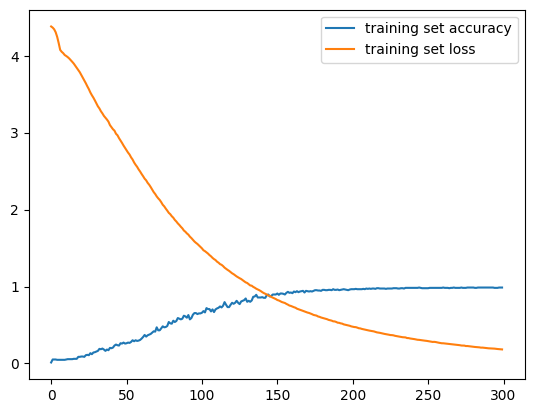

In [24]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

## Testing :-

In [ ]:
import random
while True:
    texts_p = []
    prediction_input = input('You : ')
    
    # Removing Punctuations
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    # Tokenize and Padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    # Get Output From Model
    output = model.predict(prediction_input,verbose=False)
    output = np.argmax(output)
    
    # Finding right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Bot : ",random.choice(responses[response_tag]))
    if response_tag == 'goodbye':
        break

You : Hello
Bot :  Hi there. What brings you here today?


In [ ]:
import random
import speech_recognition as sr
while True:
    texts_p = []
    
    # Listens To us
    speech = sr.Recognizer()
    listen = input("Press Enter to speak : ")
    with sr.Microphone() as source:
        print("Speak now : ")
        a1 = speech.listen(source)
    prediction_input = speech.recognize_google(a1)
    print(f"You : {prediction_input}")
    
    # Removing Punctuations
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    # Tokenize and Padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    # Get Output From Model
    output = model.predict(prediction_input,verbose=False)
    output = np.argmax(output)
    
    # Finding right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Bot : ",random.choice(responses[response_tag]))
    if response_tag == 'goodbye':
        break

In [ ]:
import random
import speech_recognition as sr
from gtts import gTTS
from IPython.display import Audio
import os
while True:
    texts_p = []
    
    # Listens
    speech = sr.Recognizer()
    listen = input("Press Enter to speak : ")
    with sr.Microphone() as source:
        print("Speak now : ")
        a1 = speech.listen(source)
    prediction_input = speech.recognize_google(a1)
    print(f"You : {prediction_input}")
    
    # Removing Punctuations
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    # Tokenize and Padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    # Get Output From Model
    output = model.predict(prediction_input,verbose=False)
    output = np.argmax(output)
    
    # Finding right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    bot_resp = random.choice(responses[response_tag])
    
    # Plays Audio
    print("Bot : \n")
    audio = gTTS(text=bot_resp,lang="en")
    audio.save("bot_reply.mp3")
    Audio('bot_reply.mp3')
    os.system('start bot_reply.mp3')
    if response_tag == 'goodbye':
        break

In [ ]:
example = input("Enter the Text data : ")
audio = gTTS(text=example,lang="en")
audio.save("english.mp3")
audio_file_path = "english.mp3"  
Audio(audio_file_path)